# Study of [EPIC201885041](https://exofop.ipac.caltech.edu/k2/edit_target.php?id=201885041)

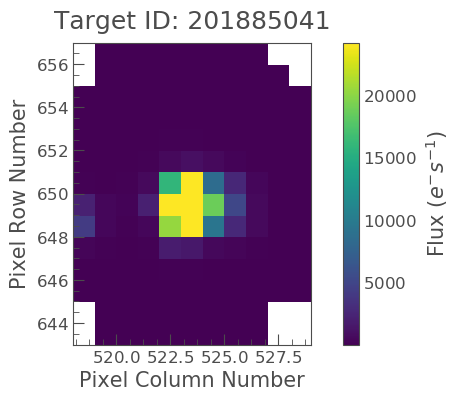

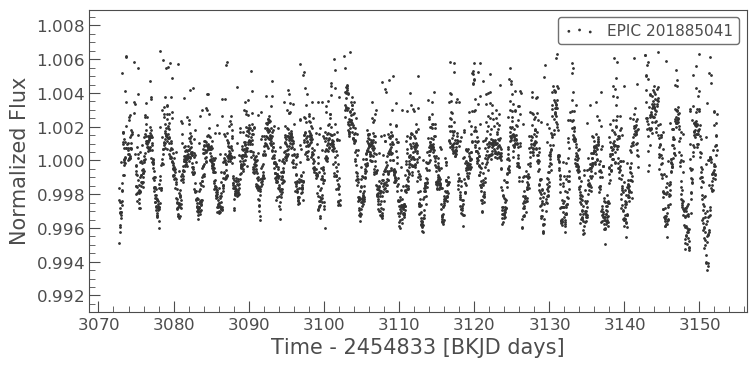

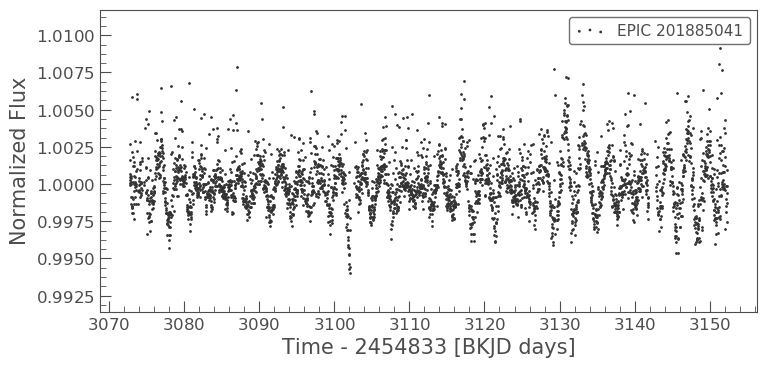

In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from lightkurve import search_lightcurvefile
from lightkurve import search_targetpixelfile
target = '201885041'

tpf = search_targetpixelfile(target).download()
tpf.plot()
lc = search_lightcurvefile(target).download().PDCSAP_FLUX.remove_nans().remove_outliers(sigma_upper=3)
lc.scatter()
corr_lc = lc.to_corrector("sff").correct(windows=10)
corr_lc_f, trend = corr_lc.flatten(window_length=401, return_trend=True)
corr_lc_f.scatter()

Best Fit Period: 2.7123 days


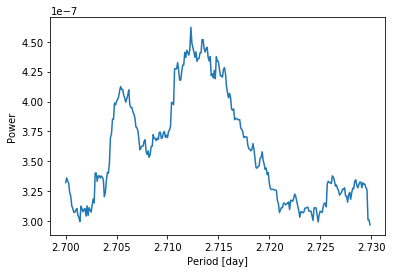

In [8]:
from astropy.stats import BoxLeastSquares
import matplotlib.pyplot as plt

bls = BoxLeastSquares(corr_lc_f.time, corr_lc_f.flux, corr_lc_f.flux_err)
periods = np.arange(2.7, 2.73, 0.0001)
durations = np.arange(0.005, 0.15, 0.001)
periodogram = bls.power(periods, durations)

plt.plot(periodogram.period, periodogram.power)
plt.ylabel("Power")
plt.xlabel("Period [day]");

period = periods[np.argmax(periodogram.power)]
print('Best Fit Period: {:0.4f} days'.format(period))

5.424600000000052

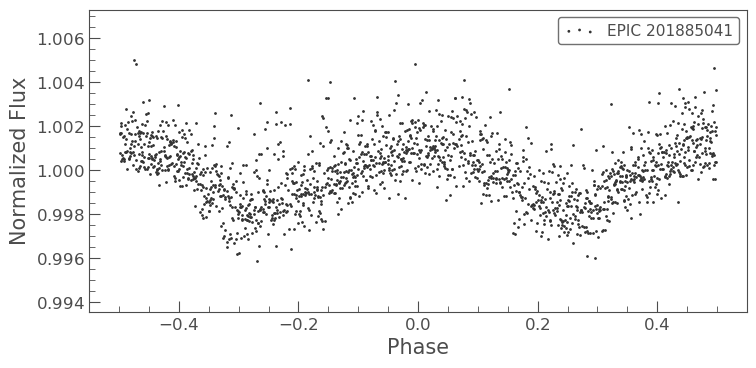

In [24]:
period_f = period * 2
lcf = corr_lc.fold(period=period_f,t0=.7).bin(2)
lcf.scatter()
lcf.time_format = 'jd'
period_f

**Pulsating star?**